In [1]:

fromDate = '2013-01-01'
#metrics = ['AdrBalUSD100Cnt'] 

coins = [ 'BTC']

In [2]:
import pandas as pd
df = pd.read_csv('data/wallets.csv', encoding = "utf-16", sep='\t')
df['Time']= pd.to_datetime(df['Time'])
df.set_index(['Time'],inplace=True, verify_integrity = True, drop = True)
df = df[fromDate:]

In [3]:
coin_colors = {
    'BTC':'orange',
    'ETH':'grey',
    'AAVE':'purple',
    'LTC':'lightblue',
    'MKR':'lightgreen',
    'MATIC_ETH':'blue',
    'UNI':'pink',
    'LDO':'darkred',
    'BAL':'brown',
    'CRV': 'red',
    'ETC' : 'lightgreen',
    'ADA':'teal',
    'BIFI' :'lightgrey',
    'LINK' : 'darkblue',
    'XRP' : 'black',
    'XLM' : 'grey',
    'ALGO' : 'green',
    'BTG' : 'yellow',
    'BAL' : 'brown',
    'SUSHI': 'magenta',
    'COMP' : 'green',
    'DOGE': 'brown',
    'BAT': 'crimson',
    'MANA': 'deeppink',
    '1INCH': 'hotpink',
    'ZEC': 'darkgrey',
    'YFI' : 'darkorange'
    
}
coin_max_supply = {
    'BTC': 21000000,
    'ETH': 122373866, # total supply as of 2023.01.01
    'AAVE':16000000,
    'LTC': 84000000,
    'MKR': 1005577,
    'MATIC_ETH': 10000000000,
    'UNI':1000000000,
    'LDO':1000000000,
    'BAL': 96150704,
    'CRV': 3303030299,
    'ETC' : 210000000,
    'ADA': 45000000000,
    'BIFI' :80000,
    'LINK' : 1000000000,
    'XRP' : 100* 1000000000,
    'XLM' : 50001806812,
    'ALGO' : 10*1000000000,
    'BTG' : 21000000,
    'SUSHI': 250000000,
    'COMP' : 10000000,
    'DOGE': 132670764300, # total supply as of 2023.01.01
    'BAT': 1500000000,
    'MANA': 2193539027, # total supply as of 2023.01.01
    '1INCH': 1500000000,
    'ZEC': 21000000,
    'YFI' : 36666
    
}

In [4]:
import math
import numpy as np
def limited_growth_function(t,p_0,k,l):
    return l*p_0/( (l-p_0)*(math.e ** (-k*t))+p_0)
def limited_growth_function_log(t,p_0,k,l):
    return np.log2(l*p_0/( (l-p_0)*(math.e ** (-k*t))+p_0))


In [5]:
import math
import numpy as np
from datetime import date

def convert_to_m2(df,dt):
    iloc_idx = df.index.get_indexer([dt], method='nearest')  # returns absolute index into df e.g. array([5])
    loc_idx = df.index[iloc_idx]                             # if you want named index
    # my_val = df.iloc[iloc_idx]
    return df.loc[loc_idx,'WM2NS'].values[0] 
df_m2 = pd.read_csv('data/WM2NS.csv')
df_m2['DATE']= pd.to_datetime(df_m2['DATE'])
df_m2.set_index(['DATE'],inplace=True, verify_integrity = True, drop = True)
df.loc(axis=1)[('USD_m2_supply')] = df.index.map(lambda dt: convert_to_m2(df_m2,dt))

btc_birthday = pd.to_datetime('2009-01-03')
m2_supply_at_genesis = convert_to_m2(df_m2,btc_birthday)
df.loc(axis=1)[('USD_m2_supply_index')] = df.loc(axis=1)[('USD_m2_supply')]/m2_supply_at_genesis

#p_0 = 314.25
p_0 = 4300000000
t_0 =  pd.Timestamp('2015-01-01')
k = 0.0013
l = 1*1000*1000*1000000

for coin in coins: 
    df.loc(axis=1)[(coin+'_Price_m2')] = df.loc(axis=1)[(coin+'_Price')] /df.loc(axis=1)[('USD_m2_supply_index')]
    df.loc(axis=1)[(coin+'_CapRealUSD_m2')] = df.loc(axis=1)[(coin+'_CapRealUSD')] /df.loc(axis=1)[('USD_m2_supply_index')]

    df.loc(axis=1)[(coin+'_Price_m2_log')] = np.log2(df.loc(axis=1)[(coin+'_Price_m2')])
    df.loc(axis=1)[(coin+'_CapRealUSD_m2_log')] = np.log2(df.loc(axis=1)[(coin+'_CapRealUSD_m2')])
    df.loc(axis=1)[(coin+'_CapRealUSD_log')] = np.log2(df.loc(axis=1)[(coin+'_CapRealUSD')])
    df.loc(axis=1)[(coin+'_t')] = (df.index-t_0).days

df

,BTC_Price,BTC_CapMrktCurUSD,BTC_CapRealUSD,BTC_AdrBal1in10BCnt,BTC_AdrBal1in1BCnt,BTC_AdrBal1in100MCnt,BTC_AdrBal1in10MCnt,BTC_AdrBalUSD10MCnt,BTC_AdrBalUSD1MCnt,BTC_AdrBalUSD100KCnt,...,SUSHI_AdrBalUSD100Cnt,SUSHI_AdrBalUSD10Cnt,USD_m2_supply,USD_m2_supply_index,BTC_Price_m2,BTC_CapRealUSD_m2,BTC_Price_m2_log,BTC_CapRealUSD_m2_log,BTC_CapRealUSD_log,BTC_t
Time,,,,,,,,,,,,,,,,,,,,,
2013-01-01,13.426984,1.418853e+08,7.799743e+07,4.436416e+05,3.294022e+05,2.108936e+05,136125.100000,0.000000,2.000000,122.000000,...,NaN,NaN,10615.7,1.274088,10.538507,6.121825e+07,3.397599,25.867459,26.216923,-730
2013-01-02,13.447772,1.421490e+08,7.815468e+07,4.444155e+05,3.296531e+05,2.110465e+05,136085.133333,0.000000,2.000000,122.266667,...,NaN,NaN,10615.7,1.274088,10.554823,6.134168e+07,3.399831,25.870364,26.219829,-729
2013-01-03,13.448255,1.422001e+08,7.829305e+07,4.454392e+05,3.299228e+05,2.112052e+05,136040.200000,0.000000,2.000000,122.333333,...,NaN,NaN,10615.7,1.274088,10.555202,6.145028e+07,3.399882,25.872916,26.222381,-728
2013-01-04,13.452887,1.422954e+08,7.842617e+07,4.465308e+05,3.302037e+05,2.113545e+05,135981.200000,0.000000,2.000000,122.600000,...,NaN,NaN,10630.2,1.275828,10.544436,6.147080e+07,3.398410,25.873398,26.224832,-727
2013-01-05,13.452270,1.423355e+08,7.855506e+07,4.477351e+05,3.305010e+05,2.114987e+05,135908.033333,0.000000,2.000000,122.733333,...,NaN,NaN,10630.2,1.275828,10.543952,6.157182e+07,3.398344,25.875767,26.227201,-726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-23,23262.291891,4.486382e+11,3.827822e+11,1.867566e+07,8.772660e+06,2.880620e+06,542216.666667,4937.833333,67705.833333,283592.900000,...,20147.933333,52958.333333,21149.1,2.538298,9164.523126,1.508027e+11,13.161844,37.133871,38.477733,2975
2023-02-24,23264.516547,4.487030e+11,3.828465e+11,1.867911e+07,8.773541e+06,2.881066e+06,542248.200000,4937.133333,67701.366667,283630.266667,...,20174.766667,52989.033333,21149.1,2.538298,9165.399562,1.508280e+11,13.161982,37.134113,38.477975,2976
2023-02-25,23269.554079,4.488218e+11,3.829162e+11,1.868346e+07,8.774550e+06,2.881490e+06,542274.033333,4936.366667,67698.200000,283678.766667,...,20181.566667,52999.566667,21149.1,2.538298,9167.384172,1.508555e+11,13.162294,37.134376,38.478238,2977


In [6]:
from scipy.optimize import curve_fit


guess = [p_0, k, l]
parameters, covariance = curve_fit(limited_growth_function, df['BTC_t'], df['BTC_CapRealUSD_m2'],p0=guess)
print("p_0={}, k={}, l={}".format(parameters[0],parameters[1],parameters[2]))
ix = pd.date_range(start=date(2011,1,1), end=date(2029, 1, 31), freq='D')
#ix = pd.date_range(date_today, date_today + timedelta(7), freq='D')
df = df.reindex(ix)
for coin in coins: 
    df.loc(axis=1)[(coin+'_CapRealUSD_m2_log_limited_growth_function_guess')] = limited_growth_function_log((df.index-t_0).days,p_0,k,l)
    df.loc(axis=1)[(coin+'_CapRealUSD_m2_limited_growth_function_guess')] = limited_growth_function((df.index-t_0).days,p_0,k,l)
    df.loc(axis=1)[(coin+'_CapRealUSD_m2_limited_growth_function_fit')] = limited_growth_function((df.index-t_0).days,
                                                                                            parameters[0],parameters[1],
                                                                                           parameters[2])
df

p_0=2668290035.3492875, k=0.0019116465769300499, l=239984156323.2434


,BTC_Price,BTC_CapMrktCurUSD,BTC_CapRealUSD,BTC_AdrBal1in10BCnt,BTC_AdrBal1in1BCnt,BTC_AdrBal1in100MCnt,BTC_AdrBal1in10MCnt,BTC_AdrBalUSD10MCnt,BTC_AdrBalUSD1MCnt,BTC_AdrBalUSD100KCnt,...,USD_m2_supply_index,BTC_Price_m2,BTC_CapRealUSD_m2,BTC_Price_m2_log,BTC_CapRealUSD_m2_log,BTC_CapRealUSD_log,BTC_t,BTC_CapRealUSD_m2_log_limited_growth_function_guess,BTC_CapRealUSD_m2_limited_growth_function_guess,BTC_CapRealUSD_m2_limited_growth_function_fit
2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.266864,6.459573e+08,1.651361e+08
2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.268738,6.467971e+08,1.654519e+08
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.270612,6.476379e+08,1.657682e+08
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.272486,6.484798e+08,1.660852e+08
2011-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.274361,6.493228e+08,1.664028e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.495537,7.750709e+11,2.388363e+11
2029-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.495959,7.752974e+11,2.388385e+11
2029-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.496380,7.755238e+11,2.388407e+11
2029-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.496801,7.757500e+11,2.388429e+11


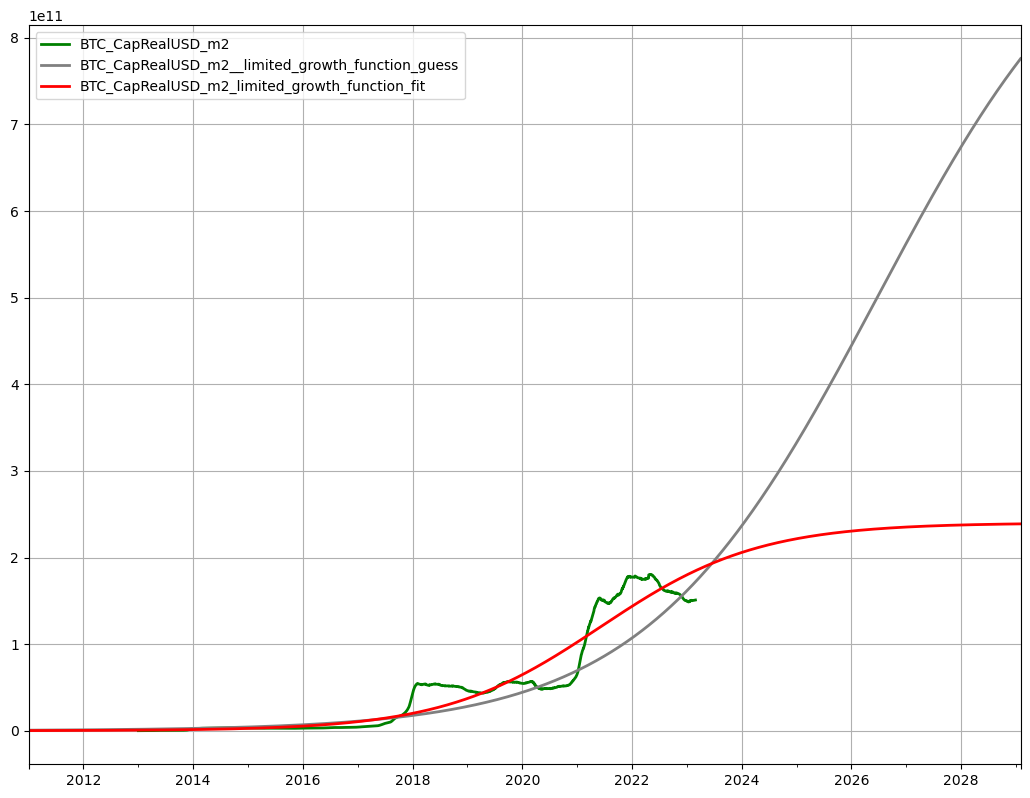

In [7]:
import matplotlib.pyplot as plt

for coin in coins: 
    #df[coin + '_Price_m2_log'].plot(c='b',label=coin + '_Price_m2',linewidth=1)
    df[coin + '_CapRealUSD_m2'].plot(c='g',label=coin + '_CapRealUSD_m2',linewidth=2)
#    df[coin + '_CapRealUSD_m2_log'].plot(c='g',label=coin + '_CapRealUSD_m2_log',linewidth=2)
#    df[coin + '_CapRealUSD_log'].plot(c='b',label=coin + '_CapRealUSD_log',linewidth=1)    
#    df[coin + '_Price_model_limited_growth_function'].plot(c='r',label=coin + '_Price_model_limited_growth_function',linewidth=2)
#    df[coin + '_CapRealUSD_m2_log_limited_growth_function_guess'].plot(c='grey',label=coin + '_CapRealUSD_m2_log_limited_growth_function_guess',linewidth=2)
    df[coin + '_CapRealUSD_m2_limited_growth_function_guess'].plot(c='grey',label=coin + '_CapRealUSD_m2__limited_growth_function_guess',linewidth=2)
    df[coin + '_CapRealUSD_m2_limited_growth_function_fit'].plot(c='r',label=coin + '_CapRealUSD_m2_limited_growth_function_fit',linewidth=2)

#    df[coin + '_CapRealUSD_m2_log_limited_growth_function_fit'].plot(c='r',label=coin + '_CapRealUSD_m2_log_limited_growth_function_guess',linewidth=2)

        #    df[coin + '_k_m2_mc'].plot(c=coin_colors[coin],label=coin + '_k_m2_mc',linewidth=2)
F = plt.gcf()
DefaultSize = F.get_size_inches()

plt.grid()
plt.legend(loc='upper left')
#plt.ylim((0,20000))
F.set_size_inches( (DefaultSize[0]*2, DefaultSize[1]*2) )